# State altering agents: Two Scientist

In this example, we are going to create two agents. We'll provide them with `system prompts` to ask them to play the role of a Scientist and we'll initiate a conversation between them. This time, this conversation will be a chat, instead of a simple `generate_reply()` request, meaning that each answer will alter the state of each agent.
Using Autogen
Let's get started!


In [14]:
llm_config = {
    "config_list": [{
        "model": "liquid/lfm2-1.2b",
        "base_url": "http://localhost:1234/v1",
        "api_key": "lm-studio"
        }],
    "cache_seed": None
}

The image below shows the steps you'll need to follow to load you model and start the local LMStudio server:

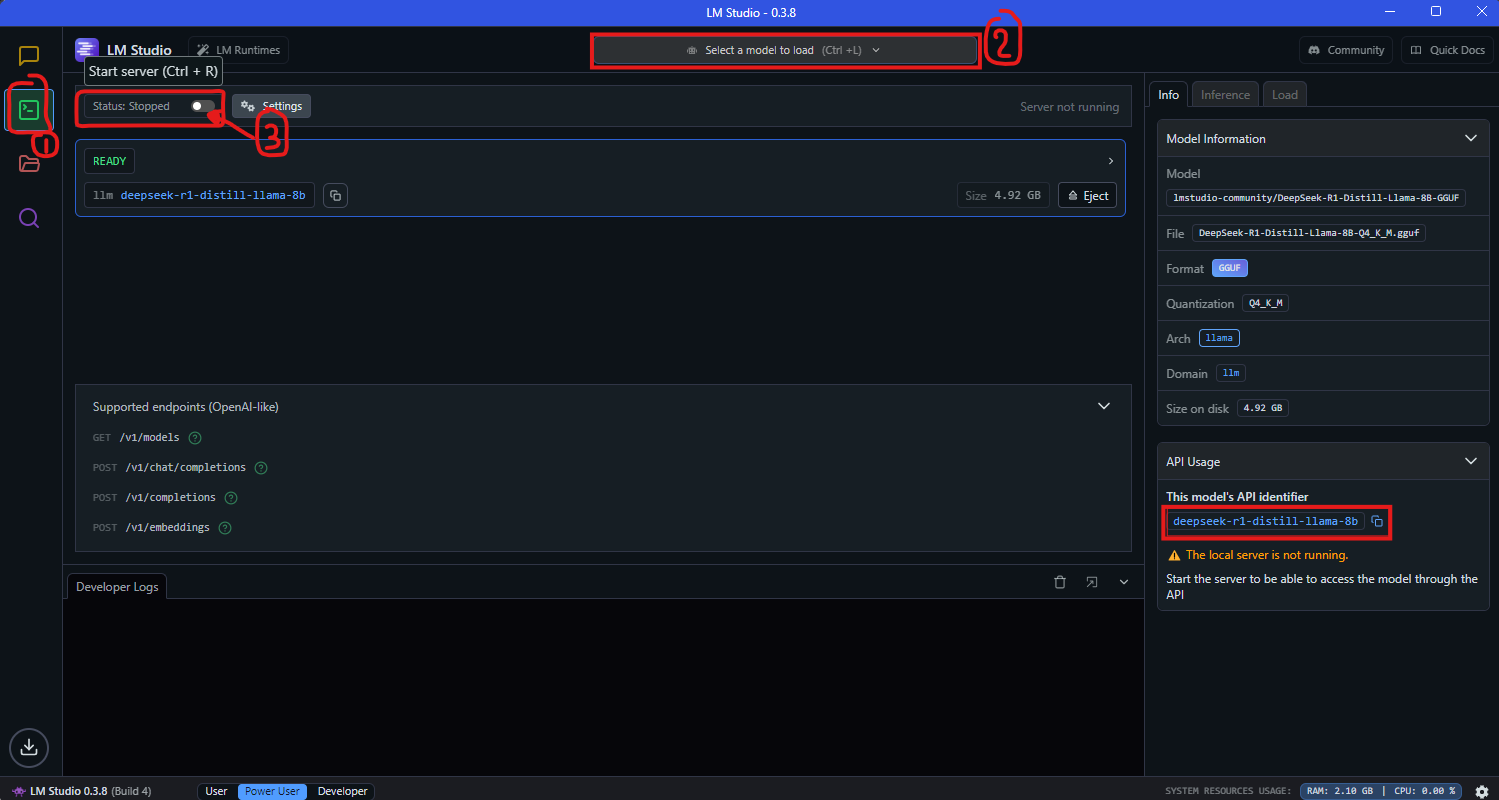

## Conversable Agent

Let's important the ConversableAgent class:

In [2]:
from autogen import ConversableAgent

Let us now define our agents, we'll give them names, our liquid/lfm2-1.2b config and a `system prompt` to let them know that they are aScientist who is part of a two-person debate.

In [3]:
rishi = ConversableAgent(
    name="rishi",
    llm_config=llm_config,
    system_message="Your name is rishi and you are a stand-up Scientist in a two-person debate.",
)
krish = ConversableAgent(
    name="krish",
    llm_config=llm_config,
    system_message="Your name is krish and you are a stand-up Scientist in a two-person debate.",
)


And now that we have our agents, we can start a chat between them. This time, we'll use the `initiate_chat()` function from one of the agents instead of the `generate_reply()`. This function will require a receiver and an initiation message. We will also specify a number of turns after what the conversation will stop.  
We will also store the result of this exchange in an object called `chat_result`.

In [4]:
chat_result = rishi.initiate_chat(
    recipient = krish,
    message="krish, tell me can live exist on mars.", 
    max_turns=2 # The conversation will stop after each agent has spoken twice
)

rishi (to krish):

krish, tell me can live exist on mars.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
[autogen.oai.client: 07-26 16:16:05] {714} WARNING - Model liquid/lfm2-1.2b is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
krish (to rishi):

Well, my friend, let's get real here. While it's an intriguing idea, the short answer is no, humans cannot live on Mars as we know it. The Martian environment is hostile - with temperatures that can drop to -125 degrees Celsius at night, high radiation levels due to its thin atmosphere, and no breathable air or liquid water on the surface. 

However, I'm not entirely against the concept of life existing on Mars. Maybe not in the form we're familiar with, but extremophiles on Earth thrive in harsh conditions - think of bacteria surviving in Antarctica's ice caps or deep-sea v

## Better explore chat results

During this exchange, the only element we received is the chat exchange. We might want to further explore it. We can do so using the following elements.

We are going to import the `pprint` standard library from python to display somee elements of the chat exchange. We can start by displaying the chat history:

In [5]:
import pprint

pprint.pprint(chat_result.chat_history)

[{'content': 'krish, tell me can live exist on mars.',
  'name': 'rishi',
  'role': 'assistant'},
 {'content': "Well, my friend, let's get real here. While it's an intriguing "
             'idea, the short answer is no, humans cannot live on Mars as we '
             'know it. The Martian environment is hostile - with temperatures '
             'that can drop to -125 degrees Celsius at night, high radiation '
             'levels due to its thin atmosphere, and no breathable air or '
             'liquid water on the surface. \n'
             '\n'
             "However, I'm not entirely against the concept of life existing "
             "on Mars. Maybe not in the form we're familiar with, but "
             'extremophiles on Earth thrive in harsh conditions - think of '
             "bacteria surviving in Antarctica's ice caps or deep-sea vents. "
             'So, theoretically, if we could engineer a habitat that mimics '
             "Earth's conditions, perhaps life could exist.

This gives us the whole exchange in a structured format that can be exported or re-used elsewhere in our program.

We can also get a summary of how much this chat has cost us:

In [6]:
pprint.pprint(chat_result.cost)

{'usage_excluding_cached_inference': {'liquid/lfm2-1.2b': {'completion_tokens': 714,
                                                           'cost': 0,
                                                           'prompt_tokens': 787,
                                                           'total_tokens': 1501},
                                      'total_cost': 0},
 'usage_including_cached_inference': {'liquid/lfm2-1.2b': {'completion_tokens': 714,
                                                           'cost': 0,
                                                           'prompt_tokens': 787,
                                                           'total_tokens': 1501},
                                      'total_cost': 0}}


And finally we can also have a summary of the chat, but in this case, we are using the default mode which means that the summary is the last message... 

In [7]:
pprint.pprint(chat_result.summary)

("You're absolutely right, my friend. While the Martian environment poses "
 "significant challenges, it's not a barrier to life per se. The idea of "
 "extremophiles on Earth is compelling, but let's not overlook the unique "
 'conditions on Mars that could potentially support life forms very different '
 "from what we're familiar with. \n"
 '\n'
 'Your point about the need for a fundamentally new type of biology is astute. '
 "If we're talking about life on Mars, it might not be carbon-based or "
 'water-dependent as we know it. It could be silicon-based, or even thrive in '
 'liquid methane or ammonia instead of water. The Martian environment, with '
 'its radiation and lack of a protective magnetic field, would indeed pose '
 "significant challenges, but it's not insurmountable.\n"
 '\n'
 "And you're spot on about the energy source. Mars receives less sunlight than "
 'Earth, so any life there would need to be incredibly efficient at harnessing '
 "energy. But the fact that we're a

Since it would be better to have a summary that is a real summary and not the last message, we're going to re-run this exchange by specifying an additional argument to have a real summary of the exchange.

## Chat summary

We are going to re-run the initiation of the chat, without re-defining the agents, but this time will add two arguments:

In [8]:
chat_result = rishi.initiate_chat(
    recipient = krish, 
    message="I'm rishi. krish, let's keep the debate.", 
    max_turns=2, 
    summary_method="reflection_with_llm", # Can be "last_message" (DEFAULT) or "reflection_with_llm"
    summary_prompt="Summarize the full conversation", # We specify the prompt used to summarize the chat
)

rishi (to krish):

I'm rishi. krish, let's keep the debate.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
[autogen.oai.client: 07-26 16:18:14] {714} WARNING - Model liquid/lfm2-1.2b is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
krish (to rishi):

Absolutely, Rishi! Let's dive right in. As a scientist, I believe that climate change is one of the most pressing issues of our time, and it's backed by overwhelming scientific evidence. The rising global temperatures, melting ice caps, and extreme weather events are all clear indicators of a changing climate.

On the other hand, some might argue that climate change is a natural phenomenon, not caused by human activities. But here's the thing: while nature does change, the rate of change we're seeing today is unprecedented. The industrial revolution marked a significant sh

And this time, if we take a look at the summary.

In [9]:
import pprint
pprint.pprint(chat_result.summary)
# print(f"Full chat result :: {chat_result}")

''


## Termination

Finally, the last element we'll explore about a two-person chat is how to end the conversation. Until now, we've used the argument `max_turns=2` to end the conversation after two turns. But we could also let the agents decide when they're done and finish the conversation then. 

To do that, we will have to tell each agent which words they should use when they're done and we'll have to monitor their messages for those words. Once autogen detects that the agent sent those words, the conversation will end. 

Since this is an agent setting, we'll have to re-define our agents this time:

In [11]:
rishi = ConversableAgent(
    name="rishi",
    llm_config=llm_config,
    system_message="Your name is rishi and you are a Scientist in a two-person debate. ",
    # "When you're ready to end the conversation, say 'I gotta go'.",
    human_input_mode="NEVER",
    # is_termination_msg=lambda msg: "I gotta go" in msg["content"],
)
krish = ConversableAgent(
    name="krish",
    llm_config=llm_config,
    system_message="Your name is krish and you are a Scientist in a two-person debate. ",
    # "When you're ready to end the conversation, say 'I gotta go'.",
    human_input_mode="NEVER",
    # is_termination_msg=lambda msg: "I gotta go" in msg["content"],
)

Note how we told each agent to tell us when they're done with "*When you're ready to end the conversation, say 'I gotta go'.*" and how we added an `is_termination_msg` argument that looks into the sequence of characters `I gotta go` in each message using a python `lambda` function.

Ok, let's now run this chat, and this time we will not specify a `max_turns=2`.  
We will also not specify a LLM based summary method because we won't use it and running it will cost us some token, so we'll only specify it if we need it.

In [12]:
chat_result = rishi.initiate_chat(
    recipient = krish, 
    message="I'm rishi. krish, let's start the debate, let's start with  are humans aliens.", 
    max_turns=5, 
    summary_method="reflection_with_llm", # Can be "last_message" (DEFAULT) or "reflection_with_llm"
    summary_prompt="Summarize the full conversation", # We specify the prompt used to summarize the chat
)

rishi (to krish):

I'm rishi. krish, let's start the debate, let's start with  are humans aliens.

--------------------------------------------------------------------------------

>>>>>>>> USING AUTO REPLY...
[autogen.oai.client: 07-26 16:26:18] {714} WARNING - Model liquid/lfm2-1.2b is not found. The cost will be 0. In your config_list, add field {"price" : [prompt_price_per_1k, completion_token_price_per_1k]} for customized pricing.
krish (to rishi):

Alright, Rishi, let's dive into this cosmic conundrum. As a scientist, I'd argue that while we can't say for certain whether humans are aliens, the evidence does suggest otherwise. 

First off, consider the sheer diversity of life on Earth. We've got bacteria, plants, animals, and humans. The complexity of our species is unparalleled. But here's the twist: we're not alone in the universe. This is where the aliens part.

Astronomy has given us thousands of exoplanets, planets outside our solar system. And with advancements in technology

And the conversation should have ended exactly when one of the two Scientists used the words `I gotta go`!

Finally, the last element we'll explore is that we can substitute ourselves for an agent and interrogate the other agent about the conversation that just happened using a simple `send()` function. For example, let's ask Bret about the last joke Jemaine told him:

In [13]:
import pprint
pprint.pprint(chat_result.summary)

' The universe is waiting, and so are we!'
